# Plot surface normals


We calculate the normal vectors of the surface cells of a 3d mesh, and then visualize the results with `PyVista`.


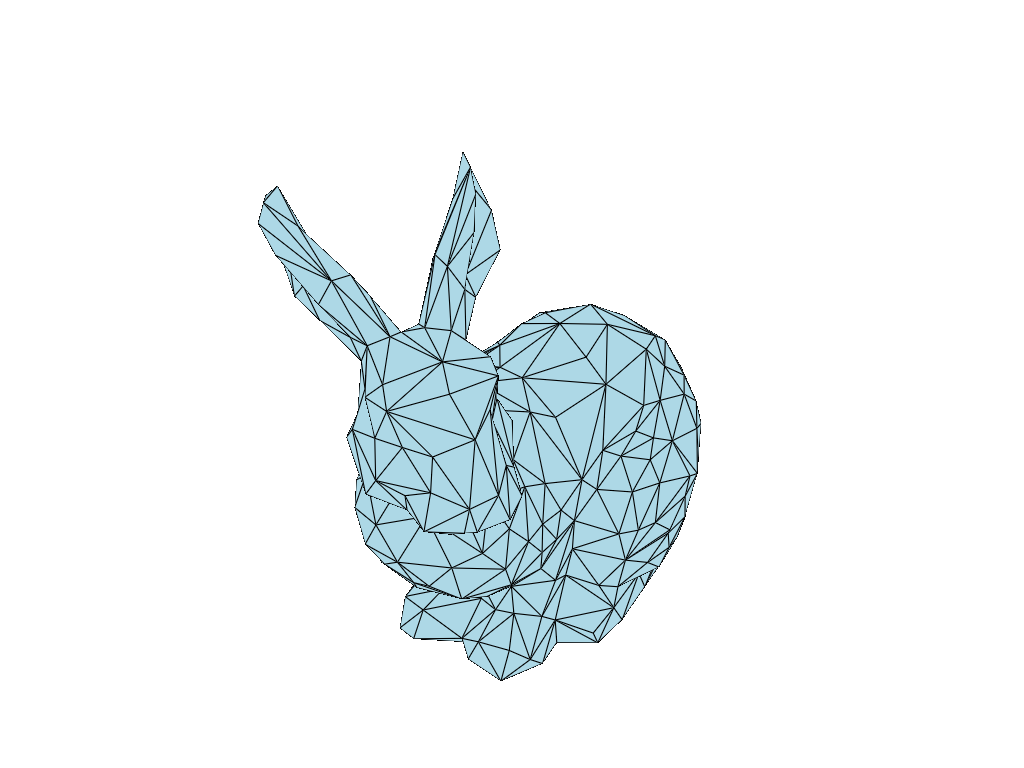

In [1]:
from sigmaepsilon.mesh.downloads import download_bunny_coarse

mesh = download_bunny_coarse(tetra=False, read=True).centralize()

mesh.plot(notebook=True, jupyter_backend="static", theme="document")

In [2]:
mesh

PolyData({5: PolyData({})})

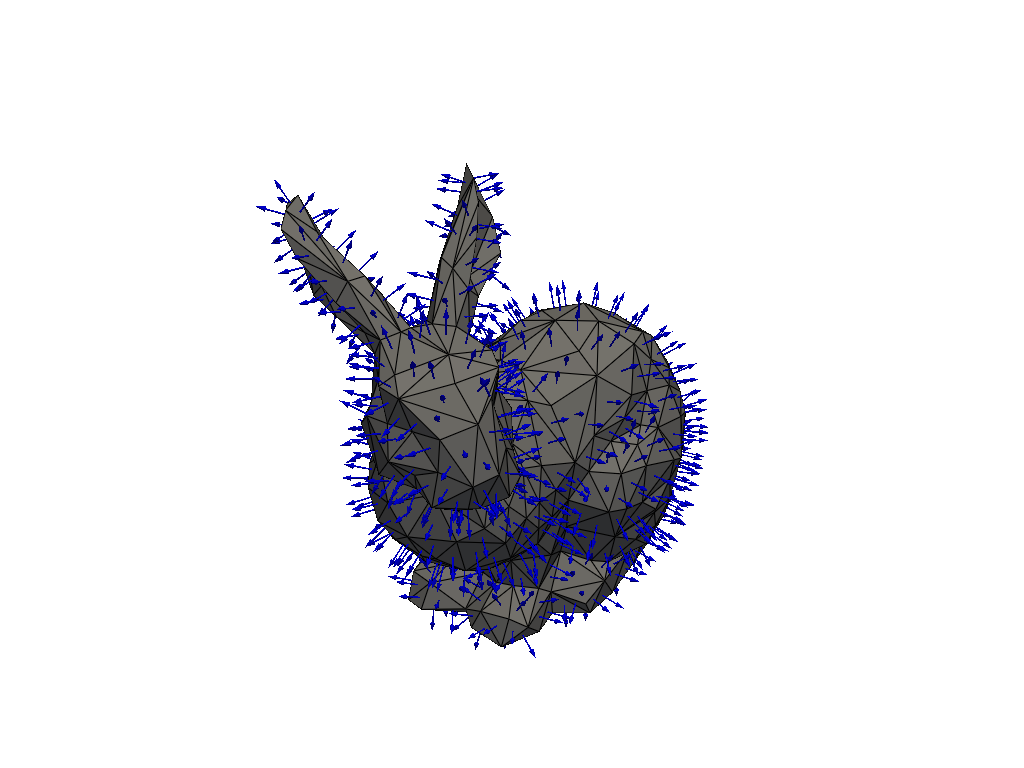

In [3]:
import pyvista as pv

plotter = pv.Plotter(notebook=True)

surface = mesh[5].surface()
plotter.add_mesh(surface.to_pv()[0], color="grey", show_edges=True)
plotter.add_arrows(surface.centers(), surface.surface_normals(), mag=0.01, color="blue")

plotter.show(jupyter_backend="static")